# Predict Student Performance from Game Play - initial EDA

This notebook will be the first revision of the Kaggle competition with the same name, as the main objective is to predict student performance during game-based learning. 

The related data was quite a challenge to understand, as this information contains the different behavior related to in-game mechanics such as clicks, problem-solving, etc. For this competition, the analyzed game was **Jo Wilder and the Capitol Case**.

Then, this first notebook is structured in the following points:

- Game understanding and objectives
- Table analysis
- Questions remarks
- Final Insights and next steps
- Bibliography

# 1. Game understanding and objectives

Before navigating through the data, I made an initial walkthrough to find information related to in-game mechanics and patterns that could affect the game's performance. First, this game is hosted on the Field Day Learning Games, where the main objective is to "design games that bring contemporary research to the public" alongside the usage of data to understand how people learn [1]

For this reason, Kaggle and the Field Day Lab hosted a competition where the aim was to predict the answer to 18 questions related to user interaction with the interface. The chosen game was Jo Wilder and the Capitol case, focused on grades 3-5 in the topic of history. 

## 1.1. Context

This competition aims to identify ways for students to engage with educational content while tackling the problem of a limited number of datasets available to apply data science, especially in the field of educational games [2]. Then, when making a walkthrough the following elements should be considered when trying to understand the data:

1. Characters: In this game, you have to interact with different characters and visit a wide variety of locations to get clues and solve mysteries related to Wisconsin history.
2. Mouse and clicks: To move in the different landscapes you must use the mouse and click where you want to travel. This is also true with the interaction with the characters.
3. Notebook: To make the information available, it was created a place where you can save the main findings of each of the clues you get through the game.
4. Time: The time you spend in each of the places depends on how you understand the game platform, alongside the analysis and possible distractions through gameplay

With this in consideration, the delivered tables were analyzed for one user, as before making a high-scale data treatment is important to understand how is related to the user behavior and different levels:

# 2. Table analysis

Kaggle introduced the following data related to the csv and feature meaning, starting with the dataset [2]:

- session_id - the ID of the session the event took place in - Related to the **user**
- index - the index of the event for the session
- elapsed_time - how much time has passed (in milliseconds) between the start of the session and when the event was recorded - Time series
- event_name - the name of the event type
- name - **the event name**
- level - what level of the game the event occurred in 
- page - the page number of the event
- room_coor_x - the coordinates of the **click** in reference to the in-game room
- room_coor_y - the coordinates of the **click** in reference to the in-game room
- screen_coor_x - the coordinates of the **click** in reference to the player’s screen
- screen_coor_y - the coordinates of the **click** in reference to the player’s screen 
- hover_duration - how long (in milliseconds) the hover happened for
- text - **the text the player sees during this event**
- fqid - the fully-qualified ID of the event
- room_fqid - the fully-qualified ID of the room the event took place in
- text_fqid - the fully-qualified ID of the
- fullscreen - whether the player is in fullscreen mode
- hq - whether the game **is in high-quality**
- music - whether the game music is on or off
- level_group - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

As referred on the text, there are clue factors such as the user ID and the fact that the data is related to each of the events that happened through the game

## 2.1. Libraries

For this analysis, I used pandas, seaborn and matplotlib to identify the patterns of a single session.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Then, I loaded the data from a parquet file that was created on the Filtering stage of the previous two notebooks and an attempt to reduce the data size, as the main objective is that this notebook could be used on a low RAM computer:

In [33]:
df=pd.read_parquet("../data/processed/filtered_V1.parquet")
df.memory_usage()

Index                  128
session_id       105393688
index             26348422
elapsed_time      52696844
event_name       105393688
name             105393688
level             13174211
room_coor_x       52696844
room_coor_y       52696844
screen_coor_x     52696844
screen_coor_y     52696844
room_fqid        105393688
level_group      105393688
dtype: int64

As with the property `.memory_usage()`, the session_id, event_name, name, room_fqid, and level columns are the ones with the most used RAM and it is related to the reduction of dimensions.

Afterward, the train_labels.csv compiles the answers for each of the 18 questions as 1 (correct) and 0 (incorrect). These were made to be able to merge with the user interaction data of the previous table:

In [34]:
scores=pd.read_csv("../data/raw/train_labels.csv")
scores.head(20)

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
5,20090315081004164_q1,0
6,20090315085850788_q1,1
7,20090315101457836_q1,1
8,20090315170769824_q1,1
9,20090317080721164_q1,0


Then, the first session was identified and filtered on the original data, obtaining a reduced dataframe

In [35]:
#Check first participant
first=[20090312431273200]
test_df=df[df["session_id"] == first[0]]
test_df.head()

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
1,20090312431273200,1,1323,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
2,20090312431273200,2,831,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
3,20090312431273200,3,1147,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
4,20090312431273200,4,1863,person_click,basic,0,-412.991394,-159.314682,381.0,494.0,tunic.historicalsociety.closet,0-4


Then, a simple description table was built from pandas function `.describe()`. As it was seen, the categorical data of event_name contains 10 unique values while the room_fqid has 19. However, the most important clue is related to the level_group feature, where there are only three labels 0-4, 5-12, and 13-22 that compile the events of each of the steps and are related to the questions.

In [36]:
test_df.describe(include="all")

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,level_group
count,8.810000e+02,881.000000,8.810000e+02,881,881,881.000000,881.000000,881.000000,881.000000,881.000000,881,881
unique,NaN,NaN,NaN,10,3,NaN,NaN,NaN,NaN,NaN,19,3
top,NaN,NaN,NaN,navigate_click,basic,NaN,NaN,NaN,NaN,NaN,tunic.historicalsociety.entry,13-22
freq,NaN,NaN,NaN,354,463,NaN,NaN,NaN,NaN,NaN,123,420
mean,2.009031e+16,467.673099,6.321691e+05,NaN,NaN,11.366629,-56.571217,-110.931877,447.589966,380.266815,NaN,NaN
std,4.002272e+00,275.000516,4.138449e+05,NaN,NaN,6.490428,492.919434,185.734360,214.956009,103.012733,NaN,NaN
min,2.009031e+16,0.000000,0.000000e+00,NaN,NaN,0.000000,-1873.683105,-849.033447,2.000000,24.000000,NaN,NaN
25%,2.009031e+16,230.000000,2.694230e+05,NaN,NaN,6.000000,-245.570831,-173.720856,325.000000,319.000000,NaN,NaN
50%,2.009031e+16,450.000000,4.810120e+05,NaN,NaN,11.000000,-42.337982,-110.829369,457.000000,385.236267,NaN,NaN
75%,2.009031e+16,711.000000,1.032034e+06,NaN,NaN,18.000000,242.386154,9.000000,620.000000,445.000000,NaN,NaN


## 2.2. User trends by level

The following plot shows the time spend in each of the three stages, where it is identified a time gap between each of the stages. Especially, in the transition between the second and third stages the time gap is higher than in the first transition. This is related to the time used for answering the questions between each section.

At the same time, the seconds used for each of the stages increase as the difficulty also changes:

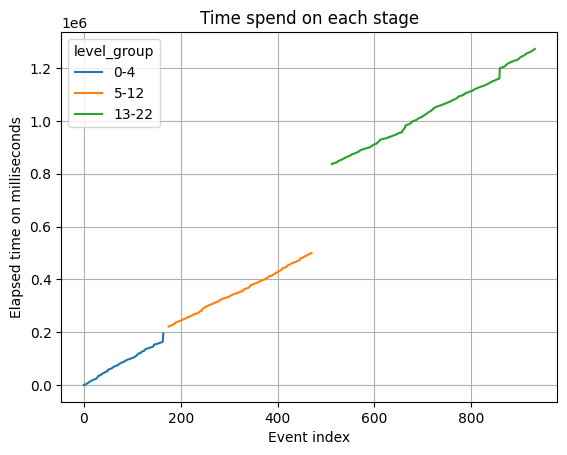

In [37]:
# Evolution of numeric variables
sns.lineplot(x=test_df["index"],y=test_df["elapsed_time"],hue=test_df["level_group"])  
plt.grid()
plt.xlabel("Event index")
plt.ylabel("Elapsed time on milliseconds")
plt.title("Time spend on each stage")
plt.show()

Similarly, the following trend shows the steps or stages navigated through the game. While in the first stage the number of events is the lowest, in the other two the totals are very similar:

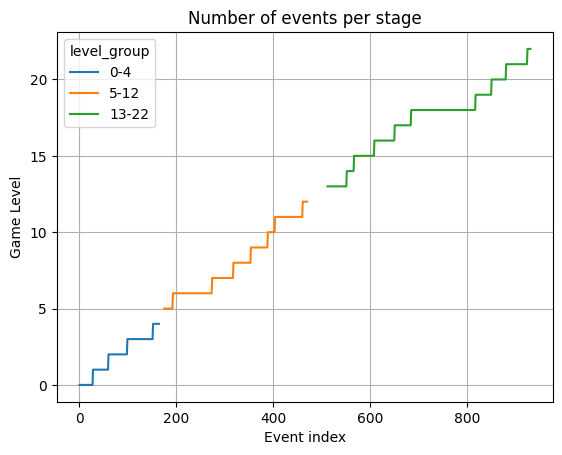

In [38]:
# Level development
sns.lineplot(x=test_df["index"],y=test_df["level"],hue=test_df["level_group"])
plt.grid()
plt.xlabel("Event index")
plt.ylabel("Game Level")
plt.title("Number of events per stage")
plt.show()

Afterward, the following plot presents the location of the clicks on the room interface, as it shows that in the last stage the mouse is used to click on the lower part of the game while in the other stages the dots are more condensed

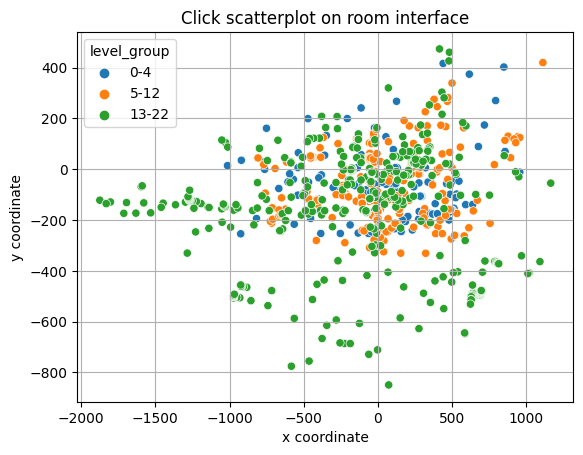

In [39]:
#Room total coordinates
sns.scatterplot(data=test_df,x="room_coor_x",y="room_coor_y",hue="level_group")
plt.grid()
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.title("Click scatterplot on room interface")
plt.show()

This is related to the screen coordinates, where there is no trend between each of the scenarios, with a small quantity of dots condensed on the lower right screen.

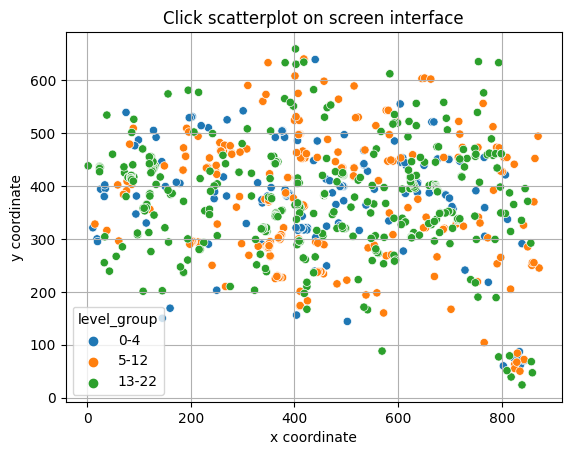

In [40]:
#Room total coordinates
sns.scatterplot(data=test_df,x="screen_coor_x",y="screen_coor_y",hue="level_group")
plt.grid()
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.title("Click scatterplot on screen interface")
plt.show()

Later, on the click meaning, the following barplot shows the category of each of the stages. The navigate clicks have the highest value while the checkpoint is only one, as it corresponds to the question answering parallel to the game. 

This is an important tool to understand the user navigation through the interface, for example on the cutscene click, where in stage 0-4 the total clicks are higher than in the following stage.

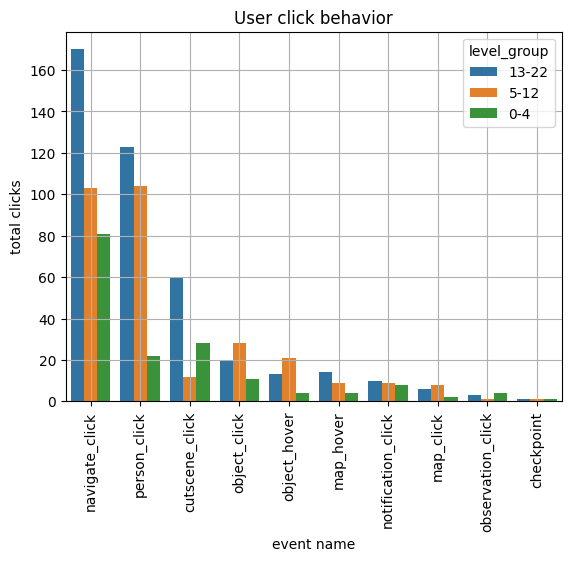

In [41]:
#Event name - Barplot
#Groupby count
plt1=test_df.groupby(by=["event_name","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="event_name",y="index",hue="level_group")
plt.xticks(rotation=90);
plt.grid()
plt.xlabel("event name")
plt.ylabel("total clicks")
plt.title("User click behavior")
plt.show()

Then, on the name general feature it is shown that the basic and undefined events have the highest frequency related to the close action. However, it is important to understand what is the meaning of this event and its importance on the user performance.

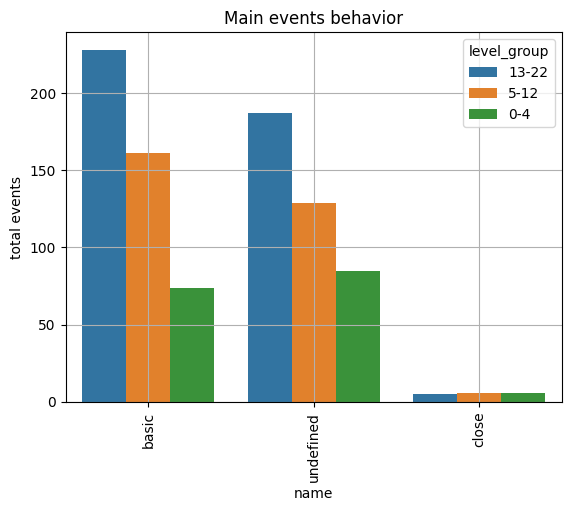

In [42]:
#Event name - Barplot
plt1=test_df.groupby(by=["name","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="name",y="index",hue="level_group")
plt.xticks(rotation=90);
plt.grid()
plt.xlabel("name")
plt.ylabel("total events")
plt.title("Main events behavior")
plt.show()

Finally, in the following figure, it is shown that each of the stages has its locations where the events happen, for example the last stage, where the clicks focused on the wildlife center and historical society cage while on the first one (0-4) it is located on historical society closet and entry.

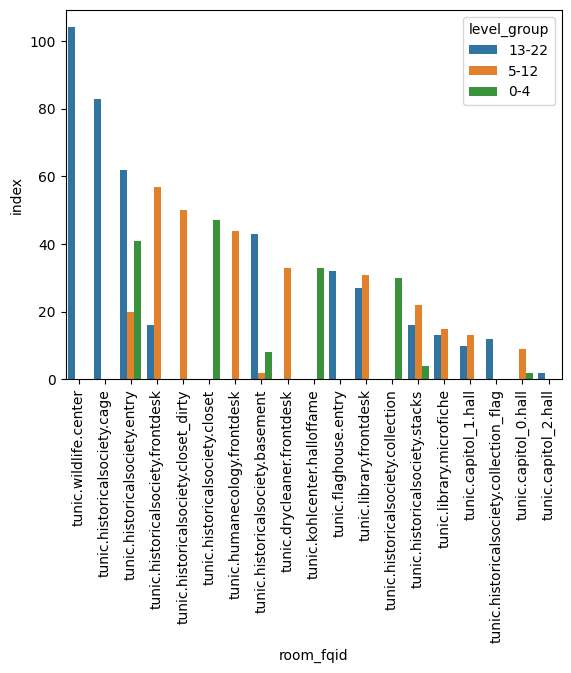

In [43]:
plt1=test_df.groupby(by=["room_fqid","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="room_fqid",y="index",hue="level_group")
plt.xticks(rotation=90);

# 3. Question remarks

To identify the questions table structure, the following code extracts the values for the first user, creating an additional column to use only the answers referred to the main user:

In [44]:
scores["user_id"] = scores["session_id"].str.rpartition("_")[0]
scores.head()

,session_id,correct,user_id
0,20090312431273200_q1,1,20090312431273200
1,20090312433251036_q1,0,20090312433251036
2,20090314121766812_q1,1,20090314121766812
3,20090314363702160_q1,1,20090314363702160
4,20090314441803444_q1,1,20090314441803444


In [45]:
#Process for numeric scale, as it is saved on string
scores["user_id"]=pd.to_numeric(scores["user_id"])

In [46]:
#Answers
scores[scores["user_id"]==first[0]]

,session_id,correct,user_id
0,20090312431273200_q1,1,20090312431273200
11779,20090312431273200_q2,1,20090312431273200
23558,20090312431273200_q3,1,20090312431273200
35337,20090312431273200_q4,1,20090312431273200
47116,20090312431273200_q5,1,20090312431273200
58895,20090312431273200_q6,1,20090312431273200
70674,20090312431273200_q7,1,20090312431273200
82453,20090312431273200_q8,1,20090312431273200
94232,20090312431273200_q9,1,20090312431273200
106011,20090312431273200_q10,1,20090312431273200


It is shown that this user only failed on questions 13 and 16. However, to be able to identify the possible correlation it is key to evaluate other users and then the overall data.

# Final Insights and next steps

After this initial approach, the following insights were identified:

1. Importance of understanding the game: Before constructing a Machine Learning Modeling it is important to understand how people can interact with the game, as to be able to do a proper feature engineering
2. Relation with stage and answer: as an initial approach, relating the responses with the user interaction on each scenario and stage is a possible fact to implement in a prediction modeling
3. Quantity of data: As these data recollects each user step is important to scale the information related to the memory limits with methods such as downcasting
4. Quality of data: In this first approach, it is seen that most of the data is available or it is clear why it is missing.

Then, the following steps would be to build a simple prediction model with a sample of the population and relate the questions to each part of the game events.

**Thanks for your attention.**

# References

[1] https://fielddaylab.wisc.edu/about/

[2] https://www.kaggle.com/competitions/predict-student-performance-from-game-play

[3] https://fielddaylab.wisc.edu/play/jowilder/